In [1]:
#Importação das bibliotecas

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Dados fornecidos
dias_semana = [1, 2, 3, 4, 5, 6, 7]  # 1 = Segunda-feira, 7 = Domingo
nº_de_clientes = [15, 20, 30, 100, 350, 500, 700]

# Criando o DataFrame
df = pd.DataFrame({
    'Dia_Semana': dias_semana,
    'Clientes': nº_de_clientes
})

# Exibir o DataFrame
df

,Dia_Semana,Clientes
0,1,15
1,2,20
2,3,30
3,4,100
4,5,350
5,6,500
6,7,700


In [3]:
# Definindo o número de clusters (por exemplo, 2 clusters: dias com baixo e alto movimento)
kmeans = KMeans(n_clusters=2, random_state=42)

# Aplicando o KMeans na coluna 'Clientes'
df['Cluster'] = kmeans.fit_predict(df[['Clientes']])

# Exibir o DataFrame com os clusters atribuídos
df

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Dia_Semana,Clientes,Cluster
0,1,15,1
1,2,20,1
2,3,30,1
3,4,100,1
4,5,350,0
5,6,500,0
6,7,700,0


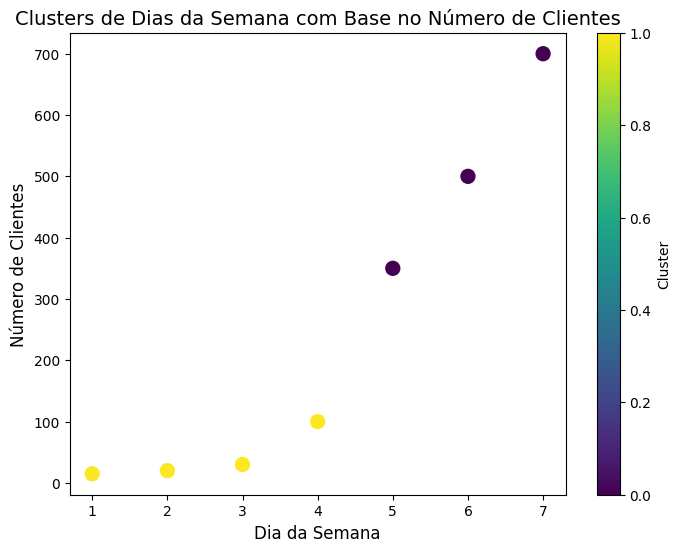

In [4]:
# Gráfico de dispersão dos dias da semana com base no número de clientes
plt.figure(figsize=(8, 6))

# Plotando os dias da semana com base nos clusters
plt.scatter(df['Dia_Semana'], df['Clientes'], c=df['Cluster'], cmap='viridis', s=100)

# Adicionando rótulos e título
plt.title('Clusters de Dias da Semana com Base no Número de Clientes', fontsize=14)
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# Exibindo o gráfico
plt.colorbar(label='Cluster')
plt.show()

In [5]:
# Visualizando os centros dos clusters
print("Centros dos clusters:")
print(kmeans.cluster_centers_)

# Visualizando os dias agrupados por cluster
df_grouped = df.groupby('Cluster')['Dia_Semana'].apply(list)
print("\nDias agrupados por cluster:")
print(df_grouped)

Centros dos clusters:
[[516.66666667]
 [ 41.25      ]]

Dias agrupados por cluster:
Cluster
0       [5, 6, 7]
1    [1, 2, 3, 4]
Name: Dia_Semana, dtype: object
